# Breast Cancer Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDClassifier, SGDRegressor, LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    mean_squared_error
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
print(f"Dataset shape: {df.shape}")
print(f"Features: {df.shape[1] - 1}")
print(f"Samples: {df.shape[0]}")
df.info()

Dataset shape: (569, 33)
Features: 32
Samples: 569
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 

# 1. Dataset Overview

In [4]:
missing_count = df.isnull().sum().sum()
print(f"Total missing values: {missing_count}")

Total missing values: 569


In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# 2. Feature Structure

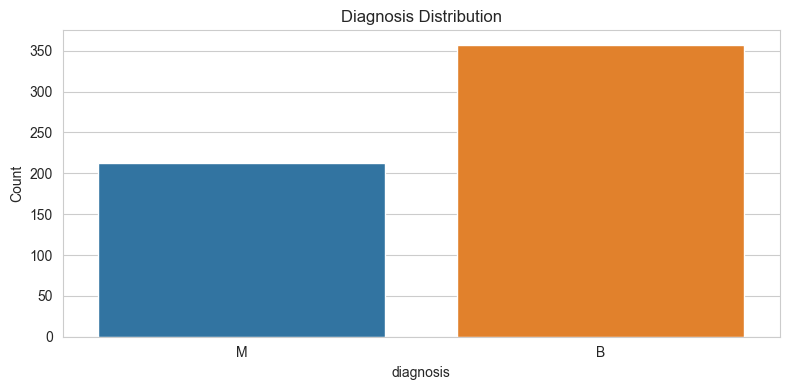

Class distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64
Imbalance ratio: 1.68:1 (Benign:Malignant)


In [6]:
plt.figure(figsize=(8, 4))
diagnosis_counts = df['diagnosis'].value_counts()
sns.countplot(x='diagnosis', data=df, hue='diagnosis', legend=False)
plt.title('Diagnosis Distribution')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
print(f"Class distribution:\n{diagnosis_counts}")
print(f"Imbalance ratio: {diagnosis_counts['B'] / diagnosis_counts['M']:.2f}:1 (Benign:Malignant)")

# 3. Data Visualization

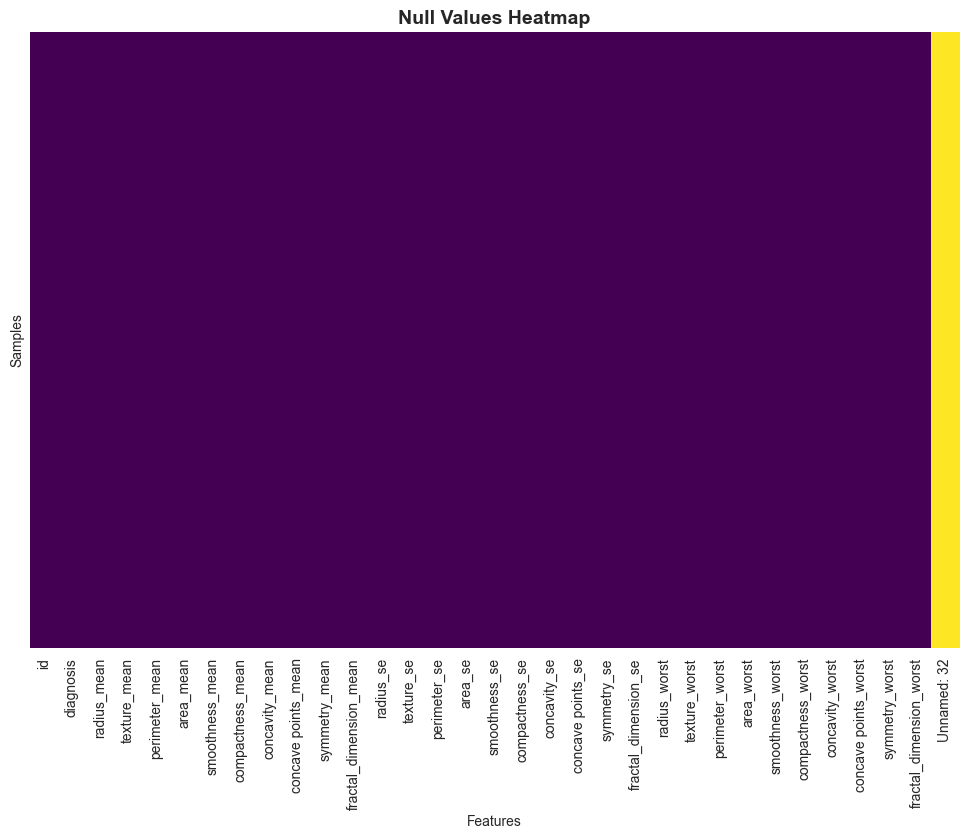

Total missing values: 569
Missing values per column:
Unnamed: 32    569
dtype: int64


In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Null Values Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

print(f"Total missing values: {df.isnull().sum().sum()}")
print("Missing values per column:")
print(df.isnull().sum()[df.isnull().sum() > 0])

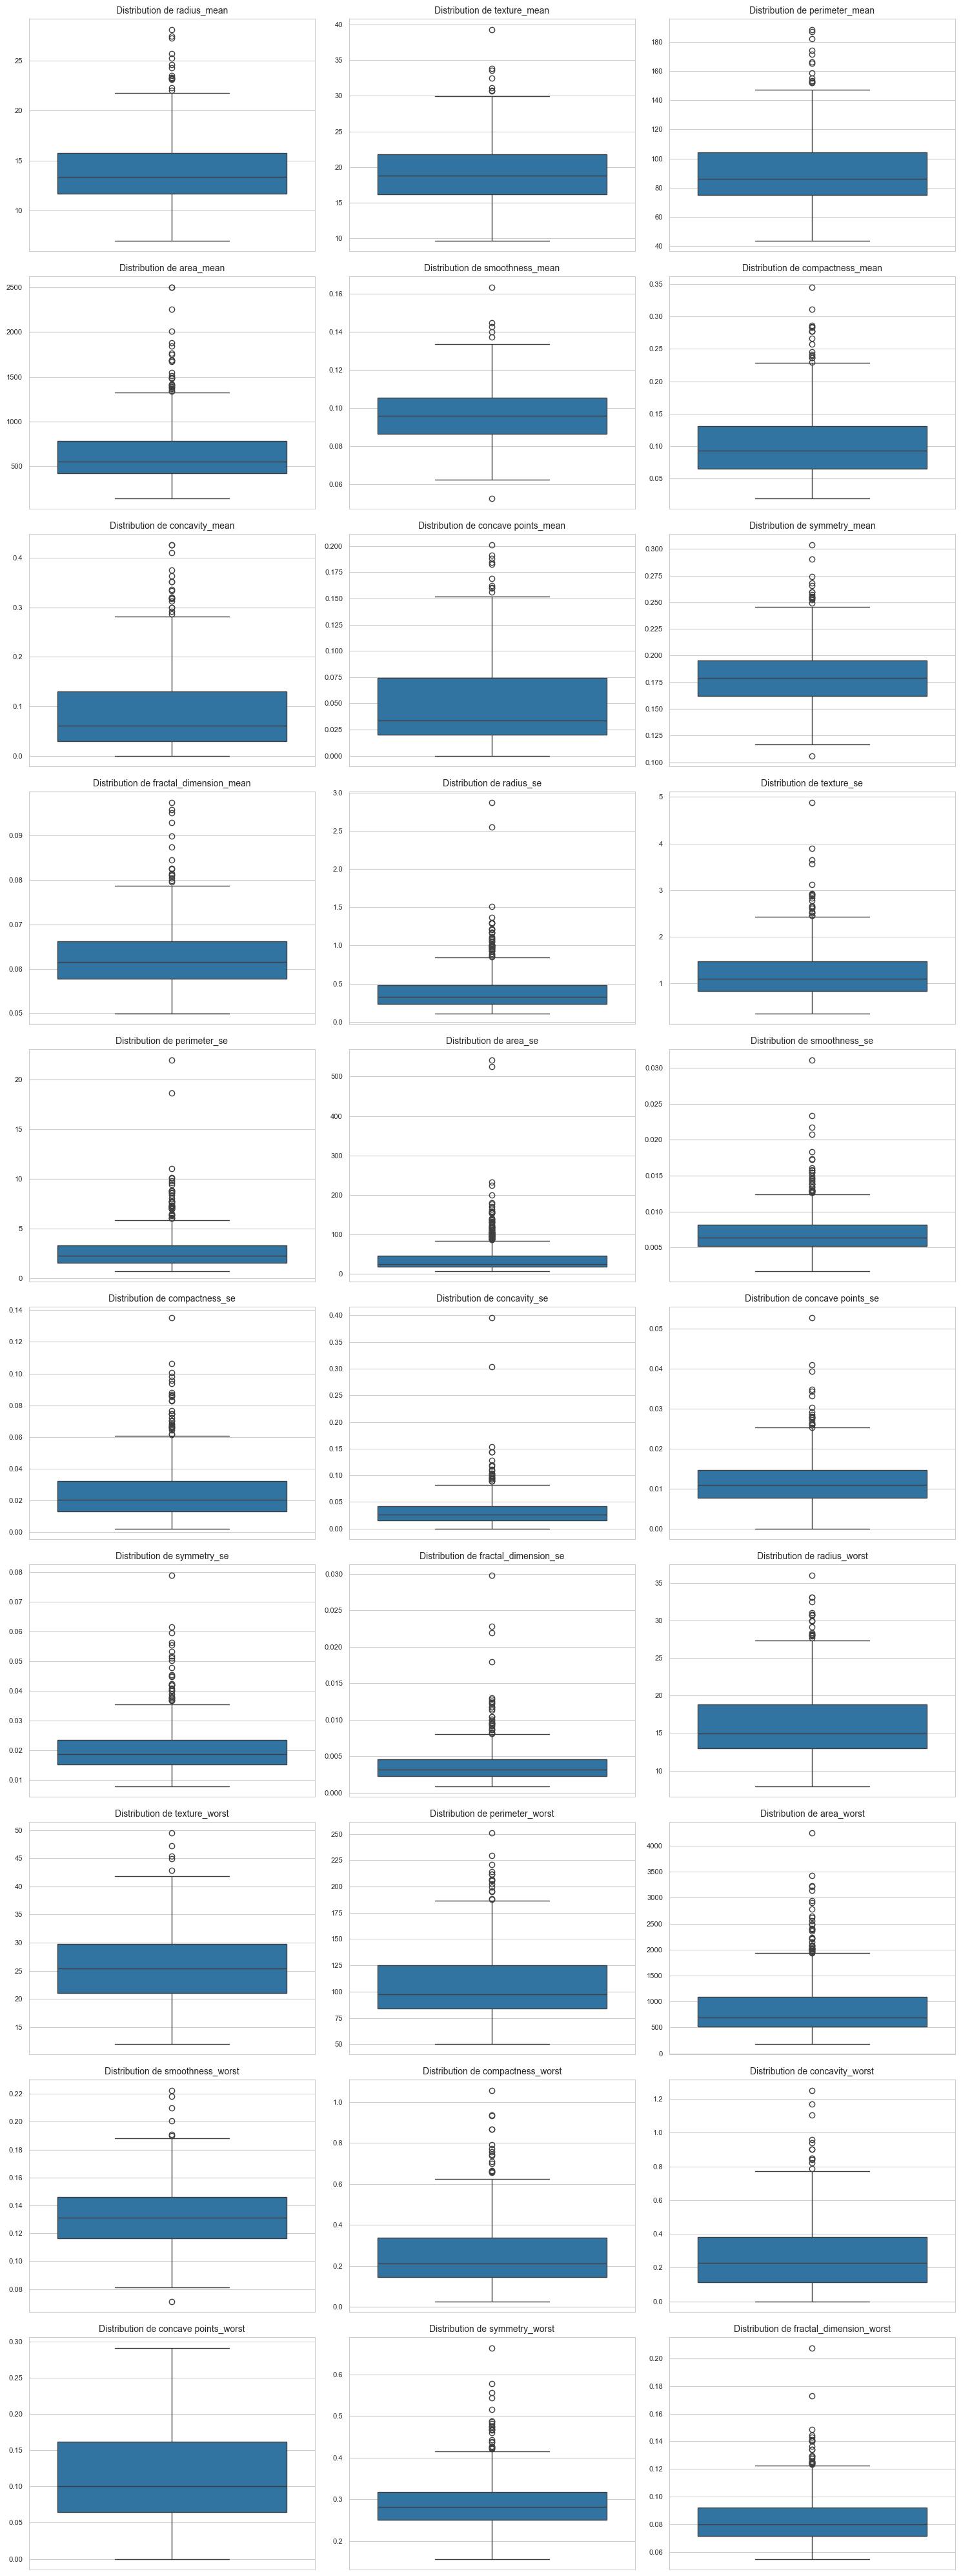

In [8]:
if 'numeric_cols' not in locals():
    numeric_cols = [col for col in df.columns if col not in ['id', 'Unnamed: 32', 'diagnosis']]

n_features = len(numeric_cols)

n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numeric_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f'Distribution de {col}', fontsize=10)
    ax.set_ylabel('')
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

# 4. Correlation Analysis

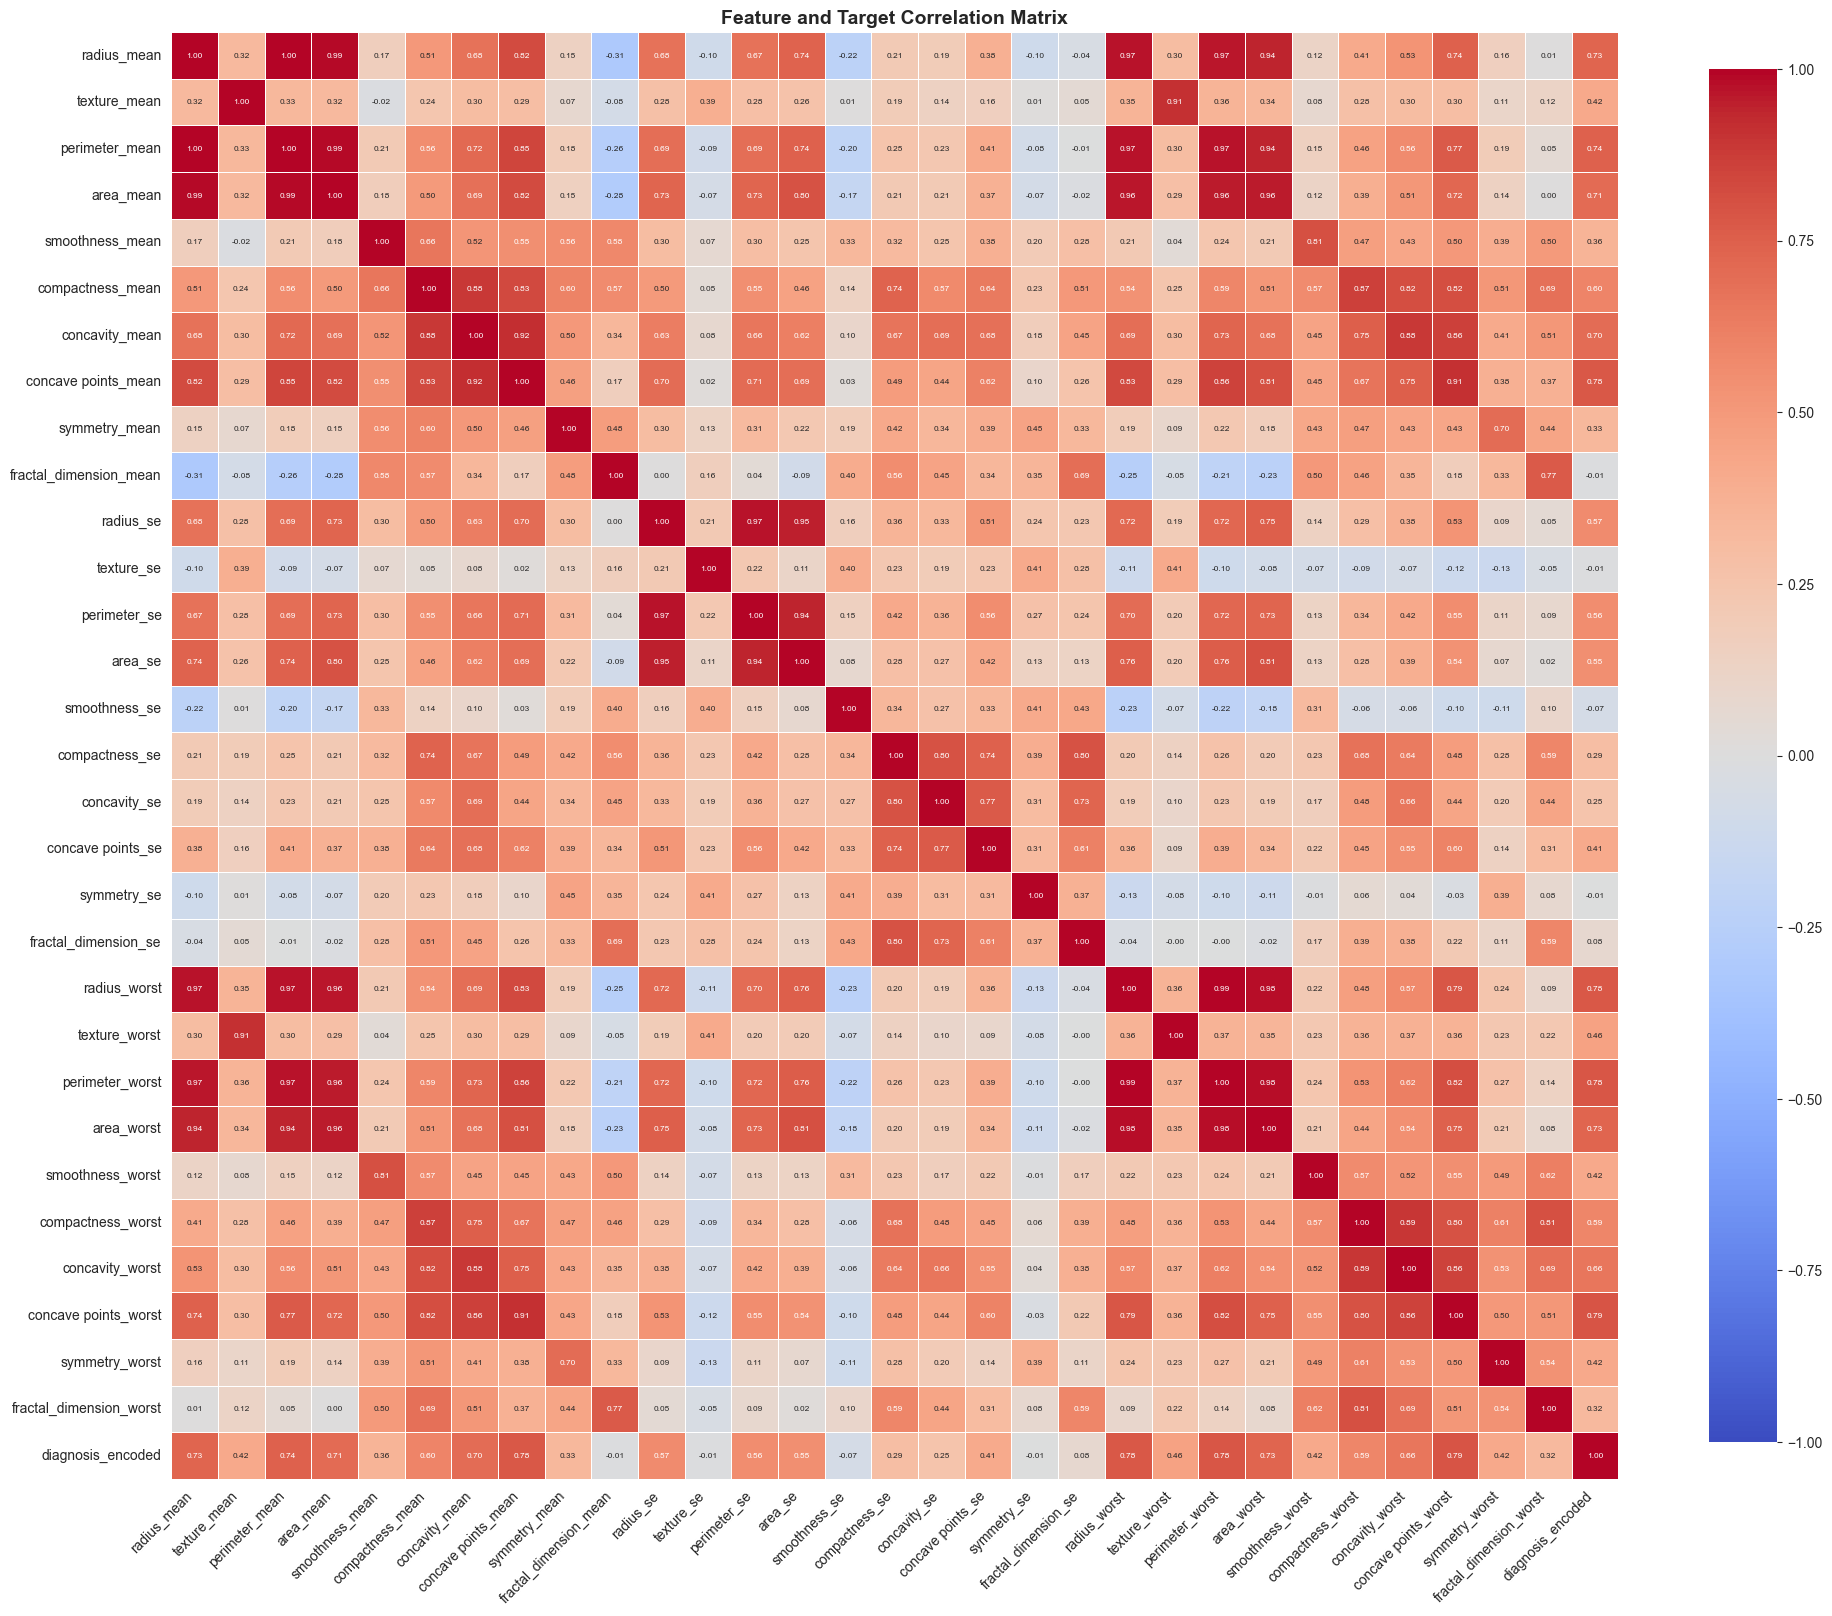

High correlations indicate related features. This is expected as features are derived from the same base measurements.
The last row/column shows correlations between features and the target (diagnosis_encoded).


In [9]:
numeric_cols = [col for col in df.columns if col not in ['id', 'Unnamed: 32', 'diagnosis']]

df_encoded = df.copy()
df_encoded['diagnosis_encoded'] = df['diagnosis'].map({'M': 1, 'B': 0})

corr_cols = numeric_cols + ['diagnosis_encoded']
corr_matrix = df_encoded[corr_cols].corr()

plt.figure(figsize=(20, 18))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    cbar_kws={"shrink": 0.8},
    vmin=-1, vmax=1,
    annot_kws={'size': 6},
    linewidths=0.5
)
plt.title('Feature and Target Correlation Matrix', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("High correlations indicate related features. This is expected as features are derived from the same base measurements.")
print("The last row/column shows correlations between features and the target (diagnosis_encoded).")

# 5. Data Preparation

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

df = df.drop(['id', 'Unnamed: 32','perimeter_mean', 'perimeter_se', 'radius_worst', 'area_mean', 'perimeter_worst', 'area_se', 'area_worst'], axis=1, errors='ignore')

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"Train set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\nTrain class distribution (before SMOTE):")
print(f"  Benign (0): {np.bincount(y_train)[0]}")
print(f"  Malignant (1): {np.bincount(y_train)[1]}")

print("\nTest class distribution:")
print(f"  Benign (0): {np.bincount(y_test)[0]}")
print(f"  Malignant (1): {np.bincount(y_test)[1]}")

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nStandardization applied: mean = 0, std = 1")

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("\nTrain class distribution (after SMOTE):")
print(f"  Benign (0): {np.bincount(y_train_smote)[0]}")
print(f"  Malignant (1): {np.bincount(y_train_smote)[1]}")

# Split for hyperparameter tuning (to avoid data leakage) - increased val size for more reliable curves
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train_scaled, y_train, test_size=0.3, random_state=42)
smote_tune = SMOTE(random_state=42)
X_train_sub_smote, y_train_sub_smote = smote_tune.fit_resample(X_train_sub, y_train_sub)

Train set: 398 samples (69.9%)
Test set: 171 samples (30.1%)

Train class distribution (before SMOTE):
  Benign (0): 250
  Malignant (1): 148

Test class distribution:
  Benign (0): 107
  Malignant (1): 64

Standardization applied: mean = 0, std = 1

Train class distribution (after SMOTE):
  Benign (0): 250
  Malignant (1): 250


# 6. Modeling

## 6.1 Linear Regression

In [11]:
learning_rates = [1e-4, 1e-3, 1e-2]
iterations = [500, 1000, 2000]
best_auc_lr = -np.inf
best_eta = None
best_iter = None

for eta in learning_rates:
    for it in iterations:
        linear_model = SGDRegressor(
            loss='squared_error',
            learning_rate='constant',
            eta0=eta,
            max_iter=it,
            random_state=42
        )
        linear_model.fit(X_train_sub, y_train_sub)
        linear_y_val_continuous = linear_model.predict(X_val)
        lr_y_val_pred = (linear_y_val_continuous >= 0.5).astype(int)
        from sklearn.preprocessing import MinMaxScaler
        prob_scaler = MinMaxScaler()
        linear_y_train_continuous = linear_model.predict(X_train_sub)
        prob_scaler.fit(linear_y_train_continuous.reshape(-1, 1))
        lr_y_val_proba = prob_scaler.transform(linear_y_val_continuous.reshape(-1, 1)).flatten()
        auc = roc_auc_score(y_val, lr_y_val_proba)
        if auc > best_auc_lr:
            best_auc_lr = auc
            best_eta = eta
            best_iter = it

linear_model = SGDRegressor(
    loss='squared_error',
    learning_rate='constant',
    eta0=best_eta,
    max_iter=best_iter,
    random_state=42
)
linear_model.fit(X_train_smote, y_train_smote)
linear_y_test_continuous = linear_model.predict(X_test_scaled)
lr_y_test_pred = (linear_y_test_continuous >= 0.5).astype(int)
prob_scaler = MinMaxScaler()
linear_y_train_continuous = linear_model.predict(X_train_smote)
prob_scaler.fit(linear_y_train_continuous.reshape(-1, 1))
lr_y_test_proba = prob_scaler.transform(linear_y_test_continuous.reshape(-1, 1)).flatten()

## 6.2 Logistic Regression

In [12]:
C_values = [0.1, 1, 10]
solvers = ['lbfgs', 'liblinear', 'newton-cg']
iterations = [1000, 3000, 5000]
best_auc_softmax = -np.inf
best_softmax_C = None
best_softmax_solver = None
best_softmax_max_iter = None

for C_val in C_values:
    for solver in solvers:
        for it in iterations:
            softmax_model = LogisticRegression(
                C=C_val,
                solver=solver,
                max_iter=it,
                random_state=42
            )
            softmax_model.fit(X_train_sub, y_train_sub)
            softmax_y_val_proba = softmax_model.predict_proba(X_val)[:, 1]
            auc = roc_auc_score(y_val, softmax_y_val_proba)
            if auc > best_auc_softmax:
                best_auc_softmax = auc
                best_softmax_C = C_val
                best_softmax_solver = solver
                best_softmax_max_iter = it

softmax_model = LogisticRegression(
    C=best_softmax_C,
    solver=best_softmax_solver,
    max_iter=best_softmax_max_iter,
    random_state=42
)
softmax_model.fit(X_train_smote, y_train_smote)
softmax_y_test_proba = softmax_model.predict_proba(X_test_scaled)[:, 1]
softmax_y_test_pred = softmax_model.predict(X_test_scaled)

## 6.3 MLP

In [13]:
learning_rates = [1e-4, 1e-3]
iterations = [1000, 3000, 5000]
hidden_layers = [(200, 200), (500, 500, 500), (300, 300, 300)]
alphas = [1e-4, 1e-3, 1e-2, 1e-1]
best_auc_mlp = -np.inf
best_mlp_hidden = None
best_mlp_alpha = None
best_mlp_lr = None
best_mlp_it = None

for hls in hidden_layers:
    for alpha in alphas:
        for lr in learning_rates:
            for it in iterations:
                mlp_model = MLPClassifier(
                    hidden_layer_sizes=hls,
                    learning_rate_init=lr,
                    learning_rate='adaptive',      # HELPS SMOOTH JITTER
                    alpha=alpha,
                    max_iter=it,
                    batch_size=128,                # MORE STABLE UPDATES
                    n_iter_no_change=20,           # PREVENTS PREMATURE STOPPING
                    early_stopping=True,
                    random_state=42,
                    validation_fraction=0.1
                )
                mlp_model.fit(X_train_sub, y_train_sub)
                mlp_y_val_proba = mlp_model.predict_proba(X_val)[:, 1]
                auc = roc_auc_score(y_val, mlp_y_val_proba)
                if auc > best_auc_mlp:
                    best_auc_mlp = auc
                    best_mlp_hidden = hls
                    best_mlp_alpha = alpha
                    best_mlp_lr = lr
                    best_mlp_it = it

mlp_model = MLPClassifier(
    hidden_layer_sizes=best_mlp_hidden,
    learning_rate_init=best_mlp_lr,
    alpha=best_mlp_alpha,
    max_iter=best_mlp_it,
    early_stopping=True,
    random_state=42,
    verbose=0,
    validation_fraction=0.1
)
mlp_model.fit(X_train_smote, y_train_smote)
mlp_y_test_proba = mlp_model.predict_proba(X_test_scaled)[:, 1]
mlp_y_test_pred = mlp_model.predict(X_test_scaled)

## 6.4 SVM

In [14]:
C_values = [0.1, 1, 10]
best_auc_svm = -np.inf
best_svm_C = None

for C in C_values:
    svm_model = SVC(C=C, kernel='linear', probability=True, random_state=42)
    svm_model.fit(X_train_sub, y_train_sub)
    svm_y_val_proba = svm_model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, svm_y_val_proba)
    if auc > best_auc_svm:
        best_auc_svm = auc
        best_svm_C = C

svm_model = SVC(C=best_svm_C, kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_smote, y_train_smote)
svm_y_test_pred = svm_model.predict(X_test_scaled)
svm_y_test_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

## 6.5 KNN

In [15]:
k_values = [1, 3, 5, 7, 9]
best_auc_knn_l1 = -np.inf
best_knn_l1_k = None
best_auc_knn_l2 = -np.inf
best_knn_l2_k = None

for k in k_values:
    knn_l1 = KNeighborsClassifier(
        n_neighbors=k,
        metric='minkowski',
        p=1
    )
    knn_l1.fit(X_train_sub, y_train_sub)
    knn_l1_y_val_proba = knn_l1.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, knn_l1_y_val_proba)
    if auc > best_auc_knn_l1:
        best_auc_knn_l1 = auc
        best_knn_l1_k = k

    knn_l2 = KNeighborsClassifier(
        n_neighbors=k,
        metric='minkowski',
        p=2
    )
    knn_l2.fit(X_train_sub, y_train_sub)
    knn_l2_y_val_proba = knn_l2.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, knn_l2_y_val_proba)
    if auc > best_auc_knn_l2:
        best_auc_knn_l2 = auc
        best_knn_l2_k = k

knn_l1 = KNeighborsClassifier(n_neighbors=best_knn_l1_k, metric='minkowski', p=1)
knn_l1.fit(X_train_smote, y_train_smote)
knn_l1_y_test_pred = knn_l1.predict(X_test_scaled)
knn_l1_y_test_proba = knn_l1.predict_proba(X_test_scaled)[:, 1]

knn_l2 = KNeighborsClassifier(n_neighbors=best_knn_l2_k, metric='minkowski', p=2)
knn_l2.fit(X_train_smote, y_train_smote)
knn_l2_y_test_pred = knn_l2.predict(X_test_scaled)
knn_l2_y_test_proba = knn_l2.predict_proba(X_test_scaled)[:, 1]

## 6.6 GRU-SVM

In [16]:
C_values = [0.1, 1, 5]
best_auc_gru = -np.inf
best_gru_units = None
best_gru_svm_C = None

n_features = X_train_sub_smote.shape[1]
X_train_gru = X_train_sub_smote.reshape(X_train_sub_smote.shape[0], n_features, 1)
X_val_gru = X_val.reshape(X_val.shape[0], n_features, 1)
X_test_gru = X_test_scaled.reshape(X_test_scaled.shape[0], n_features, 1)

gru_model = Sequential([
    Input(shape=(n_features, 1)),
    GRU(64, return_sequences=False),
    Dropout(0.3), # Reduced from 0.6
    Dense(32, activation='relu'),
    BatchNormalization(), # Added for stability
    Dense(1, activation='sigmoid')
])
gru_model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True,
    verbose=0
)
gru_model.fit(
    X_train_gru, y_train_sub_smote,
    epochs=500,
    batch_size=128,
    validation_split=0.2,
    verbose=0,
    callbacks=[early_stopping]
)

from tensorflow.keras.models import Model
model_input = gru_model.layers[0].input
feature_extractor = Model(
    inputs=model_input,
    outputs=gru_model.layers[-3].output
)
gru_train_features = feature_extractor.predict(X_train_gru, verbose=0)
gru_val_features = feature_extractor.predict(X_val_gru, verbose=0)
gru_test_features = feature_extractor.predict(X_test_gru, verbose=0)

for C_val in C_values:
    gru_svm_model = SVC(
    kernel='rbf',
    C=C_val,
    probability=True
    )
    gru_svm_model.fit(gru_train_features, y_train_sub_smote)
    gru_svm_y_val_proba = gru_svm_model.predict_proba(gru_val_features)[:, 1]
    auc = roc_auc_score(y_val, gru_svm_y_val_proba)
    if auc > best_auc_gru:
        best_auc_gru = auc
        best_gru_units = 64
        best_gru_svm_C = C_val

gru_svm_model = SVC(
    kernel='rbf',
    C=best_gru_svm_C,
    probability=True,
    random_state=42
)
gru_svm_model.fit(gru_train_features, y_train_sub_smote)
gru_svm_y_test_pred = gru_svm_model.predict(gru_test_features)
gru_svm_y_test_proba = gru_svm_model.predict_proba(gru_test_features)[:, 1]

# 7. Evaluation

In [17]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, roc_auc_score,
    recall_score, precision_score, f1_score
)
import pandas as pd

def calculate_metrics(y_true, y_pred, y_proba):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_proba),
        'recall': recall_score(y_true, y_pred, pos_label=1),
        'precision': precision_score(y_true, y_pred, pos_label=1),
        'f1_score': f1_score(y_true, y_pred, pos_label=1),
        'specificity': tn / (tn + fp) if (tn + fp) > 0 else 0.0,
        'FPR': fp / (fp + tn) if (fp + tn) > 0 else 0.0,
        'FNR': fn / (fn + tp) if (fn + tp) > 0 else 0.0,
        'TPR': tp / (tp + fn) if (tp + fn) > 0 else 0.0
    }

test_results = {
    'Linear Regression': calculate_metrics(y_test, lr_y_test_pred, lr_y_test_proba),
    'Softmax Regression': calculate_metrics(y_test, softmax_y_test_pred, softmax_y_test_proba),
    'MLP': calculate_metrics(y_test, mlp_y_test_pred, mlp_y_test_proba),
    'L2-SVM': calculate_metrics(y_test, svm_y_test_pred, svm_y_test_proba),
    'L1-NN': calculate_metrics(y_test, knn_l1_y_test_pred, knn_l1_y_test_proba),
    'L2-NN': calculate_metrics(y_test, knn_l2_y_test_pred, knn_l2_y_test_proba),
    'GRU-SVM': calculate_metrics(y_test, gru_svm_y_test_pred, gru_svm_y_test_proba)
}

results_df = pd.DataFrame(test_results).T
print(results_df)

best_hyperparameters = {
    "Linear Regression": {
        "eta0": best_eta,
        "max_iter": best_iter
    },
    "Softmax Regression": {
        "C": best_softmax_C,
        "solver": best_softmax_solver
    },
    "MLP": {
        "hidden_layer_sizes": best_mlp_hidden,
        "alpha": best_mlp_alpha
    },
    "L2-SVM": {
        "C": best_svm_C,
        "kernel": "linear"
    },
    "L1-NN": {
        "k": best_knn_l1_k,
        "metric": "manhattan"
    },
    "L2-NN": {
        "k": best_knn_l2_k,
        "metric": "euclidean"
    },
    "GRU-SVM": {
        "GRU_units": best_gru_units,
        "SVM_C": best_gru_svm_C
    }
}

for model, params in best_hyperparameters.items():
    print(f"{model}:")
    for p, v in params.items():
        print(f"  - {p}: {v}")
    print()

                    accuracy   roc_auc    recall  precision  f1_score  \
Linear Regression   0.947368  0.988026  0.906250   0.950820  0.928000   
Softmax Regression  0.982456  0.997810  0.968750   0.984127  0.976378   
MLP                 0.953216  0.990508  0.937500   0.937500  0.937500   
L2-SVM              0.959064  0.993283  0.906250   0.983051  0.943089   
L1-NN               0.964912  0.995765  0.937500   0.967742  0.952381   
L2-NN               0.970760  0.989048  0.937500   0.983607  0.960000   
GRU-SVM             0.923977  0.967874  0.890625   0.904762  0.897638   

                    specificity       FPR       FNR       TPR  
Linear Regression      0.971963  0.028037  0.093750  0.906250  
Softmax Regression     0.990654  0.009346  0.031250  0.968750  
MLP                    0.962617  0.037383  0.062500  0.937500  
L2-SVM                 0.990654  0.009346  0.093750  0.906250  
L1-NN                  0.981308  0.018692  0.062500  0.937500  
L2-NN                  0.990654

# 8. Confusion Matrices

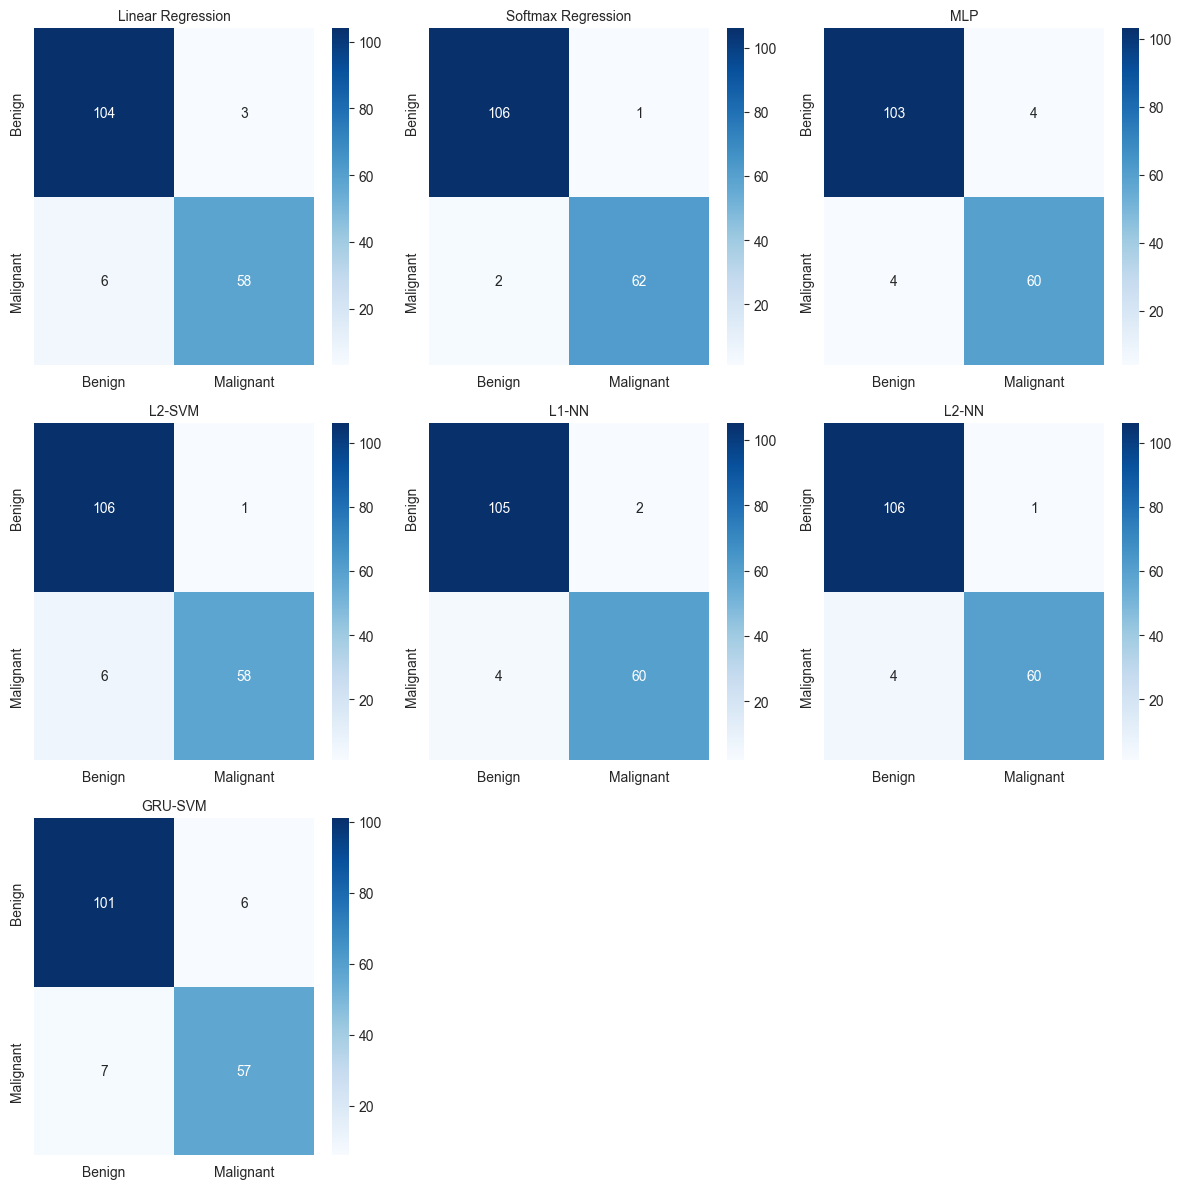

In [18]:
models_data = [
    ('Linear Regression', lr_y_test_pred),
    ('Softmax Regression', softmax_y_test_pred),
    ('MLP', mlp_y_test_pred),
    ('L2-SVM', svm_y_test_pred),
    ('L1-NN', knn_l1_y_test_pred),
    ('L2-NN', knn_l2_y_test_pred),
    ('GRU-SVM', gru_svm_y_test_pred)
]

n_models = len(models_data)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))

if n_rows == 1:
    axes = axes if isinstance(axes, np.ndarray) else [axes]
else:
    axes = axes.flatten()

for idx, (name, y_pred) in enumerate(models_data):
    ax = axes[idx]
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        ax=ax,
        xticklabels=['Benign', 'Malignant'],
        yticklabels=['Benign', 'Malignant']
    )
    ax.set_title(name, fontsize=10)

for idx in range(n_models, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# 9. Learning Curves

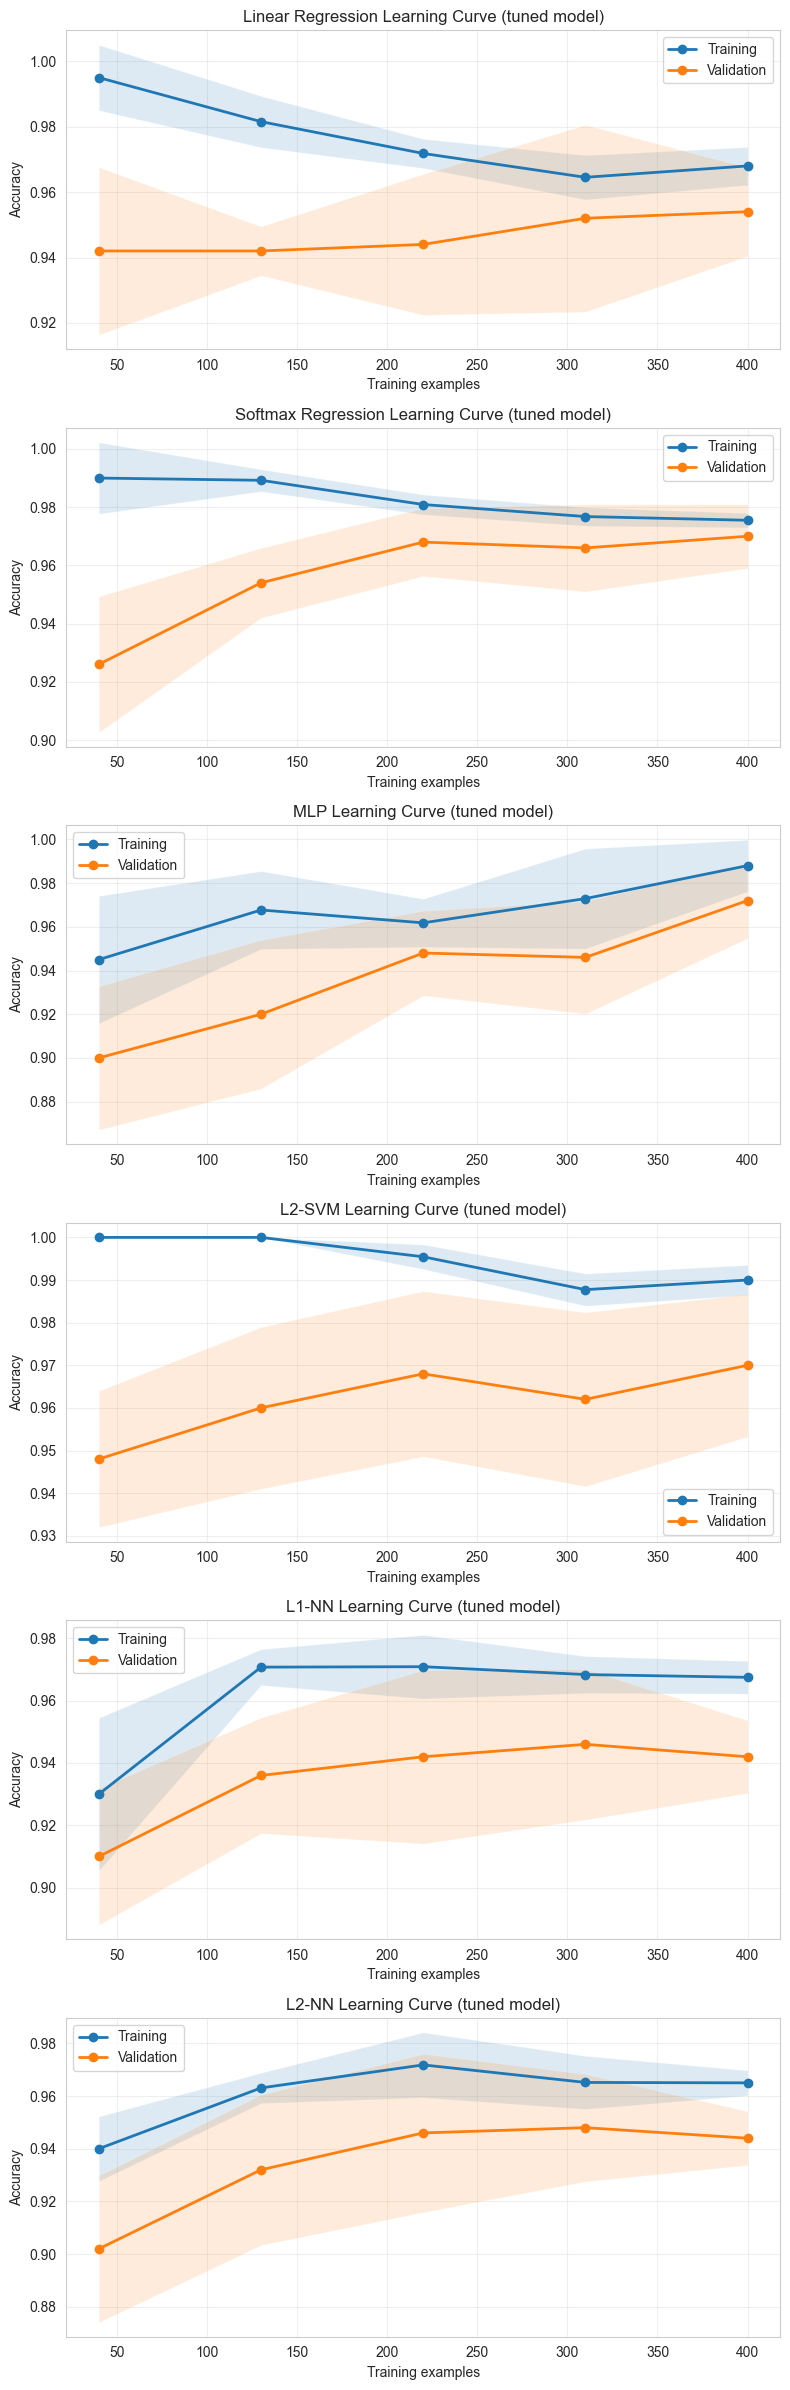

In [19]:
# 9*. Learning Curves for tuned models (Section 6)

from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score

# Custom scorer to treat the linear regressor as a classifier via a 0.5 threshold

def linear_reg_classifier_accuracy(y_true, y_pred_continuous):
    y_pred = (y_pred_continuous >= 0.5).astype(int)
    return accuracy_score(y_true, y_pred)


linear_acc_scorer = make_scorer(linear_reg_classifier_accuracy)


def plot_learning_curve(
    estimator,
    X,
    y,
    title,
    scoring,
    cv,
    ax,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5)
):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator,
        X,
        y,
        train_sizes=train_sizes,
        cv=cv,
        scoring=scoring,
        n_jobs=n_jobs
    )
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_mean = val_scores.mean(axis=1)
    val_std = val_scores.std(axis=1)

    ax.plot(train_sizes, train_mean, 'o-', label='Training', linewidth=2)
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
    ax.plot(train_sizes, val_mean, 'o-', label='Validation', linewidth=2)
    ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15)
    ax.set_title(title)
    ax.set_xlabel('Training examples')
    ax.set_ylabel('Accuracy')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best')


# Recreate tuned models (same hyperparameters as in Section 6)
linear_est = SGDRegressor(
    loss='squared_error',
    learning_rate='constant',
    eta0=best_eta,
    max_iter=best_iter,
    random_state=42
)

softmax_est = LogisticRegression(
    C=best_softmax_C,
    solver=best_softmax_solver,
    max_iter=best_softmax_max_iter,
    random_state=42
)

mlp_est = MLPClassifier(
    hidden_layer_sizes=best_mlp_hidden,
    learning_rate_init=best_mlp_lr,
    learning_rate='adaptive',
    alpha=best_mlp_alpha,
    max_iter=best_mlp_it,
    batch_size=128,
    n_iter_no_change=20,
    early_stopping=True,
    random_state=42,
    validation_fraction=0.1
)

svm_est = SVC(
    C=best_svm_C,
    kernel='linear',
    probability=True,
    random_state=42
)

knn_l1_est = KNeighborsClassifier(
    n_neighbors=best_knn_l1_k,
    metric='minkowski',
    p=1
)

knn_l2_est = KNeighborsClassifier(
    n_neighbors=best_knn_l2_k,
    metric='minkowski',
    p=2
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_lc = [
    ('Linear Regression', linear_est, linear_acc_scorer),
    ('Softmax Regression', softmax_est, 'accuracy'),
    ('MLP', mlp_est, 'accuracy'),
    ('L2-SVM', svm_est, 'accuracy'),
    ('L1-NN', knn_l1_est, 'accuracy'),
    ('L2-NN', knn_l2_est, 'accuracy')
]

n_models = len(models_lc)
fig, axes = plt.subplots(n_models, 1, figsize=(8, 4 * n_models))
if n_models == 1:
    axes = [axes]

for ax, (name, est, scoring) in zip(axes, models_lc):
    plot_learning_curve(
        est,
        X_train_smote,
        y_train_smote,
        f'{name} Learning Curve (tuned model)',
        scoring=scoring,
        cv=cv,
        ax=ax,
        n_jobs=-1
    )

plt.tight_layout()
plt.show()

In [20]:
# 9.2 Optimization dynamics for proxy SGD-based models (not the tuned Section 6 estimators)

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.model_selection import train_test_split

def compute_loss_acc(model, X, y):
    proba = model.predict_proba(X)[:, 1]
    loss = -np.mean(y * np.log(proba + 1e-10) + (1 - y) * np.log(1 - proba + 1e-10))
    pred = model.predict(X)
    acc = accuracy_score(y, pred)
    return loss, acc

def track_mlp_history(X_train, y_train, max_iter=300):
    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    model = MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.005, alpha=0.05, max_iter=1, random_state=42, warm_start=True)
    history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}
    for _ in range(max_iter):
        model.fit(X_train_split, y_train_split)
        train_loss, train_acc = compute_loss_acc(model, X_train_split, y_train_split)
        val_loss, val_acc = compute_loss_acc(model, X_val, y_val)
        history['loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['accuracy'].append(train_acc)
        history['val_accuracy'].append(val_acc)
    return history

def track_model_history(model_class, loss_type, X_train, y_train, max_iter=300):
    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    model = model_class(loss=loss_type, learning_rate='constant', eta0=1e-3, max_iter=1, random_state=42, warm_start=True)
    history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}
    for _ in range(max_iter):
        model.fit(X_train_split, y_train_split)
        if hasattr(model, 'predict_proba'):
            train_loss, train_acc = compute_loss_acc(model, X_train_split, y_train_split)
            val_loss, val_acc = compute_loss_acc(model, X_val, y_val)
        else:
            train_pred = model.predict(X_train_split)
            val_pred = model.predict(X_val)
            if loss_type == 'squared_error':
                train_loss = np.mean((train_pred - y_train_split)**2)
                val_loss = np.mean((val_pred - y_val)**2)
                train_acc = accuracy_score(y_train_split, (train_pred >= 0.5).astype(int))
                val_acc = accuracy_score(y_val, (val_pred >= 0.5).astype(int))
            else:
                decision_train = model.decision_function(X_train_split)
                decision_val = model.decision_function(X_val)
                train_loss = np.mean(np.maximum(0, 1 - y_train_split * decision_train))
                val_loss = np.mean(np.maximum(0, 1 - y_val * decision_val))
                train_acc = accuracy_score(y_train_split, train_pred)
                val_acc = accuracy_score(y_val, val_pred)
        history['loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['accuracy'].append(train_acc)
        history['val_accuracy'].append(val_acc)
    return history

all_models_history = {
    'MLP': track_mlp_history(X_train_smote, y_train_smote),
    'GRU-SVM': gru_model.history.history,
    'L2-SVM': track_model_history(SGDClassifier, 'hinge', X_train_smote, y_train_smote),
    'Softmax Regression': track_model_history(SGDClassifier, 'log_loss', X_train_smote, y_train_smote),
    'Linear Regression': track_model_history(SGDRegressor, 'squared_error', X_train_smote, y_train_smote)
}

for model_name, history in all_models_history.items():
    if history['loss'] and history['val_loss']:
        final_train_loss = history['loss'][-1]
        final_val_loss = history['val_loss'][-1]
        loss_gap = final_train_loss - final_val_loss
        final_train_acc = history['accuracy'][-1]
        final_val_acc = history['val_accuracy'][-1]
        acc_gap = final_train_acc - final_val_acc
        print(f"{model_name}:")
        print(f"  Loss Gap (Train - Val): {loss_gap:.4f}")
        print(f"  Accuracy Gap (Train - Val): {acc_gap:.4f}")
        if loss_gap > 0.1 or acc_gap > 0.1:
            print("  Possible overfitting detected.")
        else:
            print("  No significant overfitting.")
        print()

from sklearn.metrics import roc_auc_score, f1_score, classification_report

final_models = {
    'MLP': MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.005, alpha=0.05, max_iter=1000, random_state=42),
    'GRU-SVM': gru_svm_model,
    'L2-SVM': SGDClassifier(loss='hinge', learning_rate='constant', eta0=1e-3, max_iter=1000, random_state=42),
    'Softmax Regression': SGDClassifier(loss='log_loss', learning_rate='constant', eta0=1e-3, max_iter=1000, random_state=42),
    'Linear Regression': SGDRegressor(loss='squared_error', learning_rate='constant', eta0=1e-3, max_iter=1000, random_state=42)
}

results = {}
for name, model in final_models.items():
    if name == 'GRU-SVM':
        y_pred = gru_svm_y_test_pred
        y_proba = gru_svm_y_test_proba
    else:
        model.fit(X_train_smote, y_train_smote)
        y_pred = model.predict(X_test_scaled)
        if hasattr(model, 'predict_proba'):
            y_proba = model.predict_proba(X_test_scaled)[:, 1]
        elif hasattr(model, 'decision_function'):
            y_proba = model.decision_function(X_test_scaled)
        else:
            y_proba = model.predict(X_test_scaled)
            y_pred = (y_proba >= 0.5).astype(int)
    auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {'AUC': auc, 'F1-Score': f1, 'Accuracy': acc}

for model, metrics in results.items():
    print(f"{model}:")
    print(f"  AUC: {metrics['AUC']:.3f}")
    print(f"  F1-Score: {metrics['F1-Score']:.3f}")
    print(f"  Accuracy: {metrics['Accuracy']:.3f}")
    print()

MLP:
  Loss Gap (Train - Val): -0.0337
  Accuracy Gap (Train - Val): 0.0175
  No significant overfitting.

GRU-SVM:
  Loss Gap (Train - Val): -0.5002
  Accuracy Gap (Train - Val): 0.4643
  Possible overfitting detected.

L2-SVM:
  Loss Gap (Train - Val): 0.0906
  Accuracy Gap (Train - Val): 0.0050
  No significant overfitting.

Softmax Regression:
  Loss Gap (Train - Val): 0.0065
  Accuracy Gap (Train - Val): 0.0075
  No significant overfitting.

Linear Regression:
  Loss Gap (Train - Val): -0.0049
  Accuracy Gap (Train - Val): 0.0200
  No significant overfitting.

MLP:
  AUC: 0.982
  F1-Score: 0.944
  Accuracy: 0.959

GRU-SVM:
  AUC: 0.968
  F1-Score: 0.898
  Accuracy: 0.924

L2-SVM:
  AUC: 0.997
  F1-Score: 0.968
  Accuracy: 0.977

Softmax Regression:
  AUC: 0.998
  F1-Score: 0.961
  Accuracy: 0.971

Linear Regression:
  AUC: 0.998
  F1-Score: 0.976
  Accuracy: 0.982



# 10. Conclusion

In [21]:
best_model = results_df['accuracy'].idxmax()
best_accuracy = results_df.loc[best_model, 'accuracy']
best_roc_auc = results_df.loc[best_model, 'roc_auc']

print(f"Meilleur Modèle : {best_model}")
print(f"  Accuracy sur Test : {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"  ROC-AUC : {best_roc_auc:.4f}")

print("Tous les modèles ont dépassé le seuil de 90% d'accuracy :")
for model in results_df.index:
    acc = results_df.loc[model, 'accuracy']
    print(f"  {model}: {acc*100:.2f}%")

Meilleur Modèle : Softmax Regression
  Accuracy sur Test : 0.9825 (98.25%)
  ROC-AUC : 0.9978
Tous les modèles ont dépassé le seuil de 90% d'accuracy :
  Linear Regression: 94.74%
  Softmax Regression: 98.25%
  MLP: 95.32%
  L2-SVM: 95.91%
  L1-NN: 96.49%
  L2-NN: 97.08%
  GRU-SVM: 92.40%
